In [0]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,recall_score,classification_report,f1_score,accuracy_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



In [0]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [0]:
df = pd.read_csv('/content/drive/My Drive/creditcard.csv')

In [125]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
df.shape,df.dtypes

((284807, 31), Time      float64
 V1        float64
 V2        float64
 V3        float64
 V4        float64
 V5        float64
 V6        float64
 V7        float64
 V8        float64
 V9        float64
 V10       float64
 V11       float64
 V12       float64
 V13       float64
 V14       float64
 V15       float64
 V16       float64
 V17       float64
 V18       float64
 V19       float64
 V20       float64
 V21       float64
 V22       float64
 V23       float64
 V24       float64
 V25       float64
 V26       float64
 V27       float64
 V28       float64
 Amount    float64
 Class       int64
 dtype: object)

In [127]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [0]:
df['Amount'] = StandardScaler().fit_transform((df['Amount'].values).reshape(-1, 1))

In [0]:
df = df.drop('Time',1)

In [0]:
x = df.drop('Class',axis = 1)
y = df['Class']

In [0]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size = 0.3,random_state = 42)

# smote

In [133]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [134]:
sm = SMOTE(random_state = 42)
xtrain_res,ytrain_res=sm.fit_sample(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [135]:
print(xtrain.shape)
print(ytrain.shape)
print(xtrain_res.shape)
print(ytrain_res.shape)

(199364, 29)
(199364,)
(398016, 29)
(398016,)


In [103]:
unique_classes = list(df['Class'].unique())
unique_classes

[0, 1]

In [0]:
from sklearn.linear_model  import LogisticRegression

In [137]:
model = LogisticRegression(C = 0.0001, tol = 0.000001, class_weight = "balanced",random_state = 42)
model.fit(xtrain_res,ytrain_res)

LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=1e-06, verbose=0,
                   warm_start=False)

In [0]:
c = clf.predict(xtest)

In [139]:
confusion_matrix(ytest,c)

array([[85279,    28],
       [   23,   113]])

In [140]:
print("Classification Report")
print (classification_report(ytest,c))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.80      0.83      0.82       136

    accuracy                           1.00     85443
   macro avg       0.90      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [141]:
generate_model_report(ytest,c)

Accuracy =  0.999403110845827
Precision =  0.8014184397163121
Recall =  0.8308823529411765
F1 Score =  0.8158844765342961


# weight

In [142]:
out_dict = {}
for classes in unique_classes:
    out_dict[classes] = df.shape[0]/((df.loc[df['Class'] == classes].shape[0])
                                     *len(unique_classes))
    print(df.loc[df['Class'] == classes].shape[0])

284315
492


In [143]:
out_dict

{0: 0.5008652375006595, 1: 289.4380081300813}

In [144]:
clf = LogisticRegression(class_weight='balanced').fit(xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
from sklearn.utils import class_weight

In [0]:
ytrain = pd.DataFrame(ytrain)

In [149]:
class_weight.compute_class_weight('balanced',np.unique(ytrain),ytrain['Class'])

array([  0.50089444, 280.00561798])

In [0]:
pred =  clf.predict(xtest)

In [151]:
generate_model_report(ytest,pred)

Accuracy =  0.9741933218636986
Precision =  0.05428694528220594
Recall =  0.9264705882352942
F1 Score =  0.10256410256410256


In [152]:
confusion_matrix(ytest,pred)

array([[83112,  2195],
       [   10,   126]])

In [153]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(xtrain, ytrain)
print("Best parameters : %s" % grid_result.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best parameters : {'class_weight': {0: 0.14473684210526316, 1: 0.8552631578947368}}


In [154]:
grid_result

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [{0: 0.05, 1: 0.9...
                                           1: 0.3342105263157895},
                                          {0: 0.7131578947368421,
                                           1: 0.2868421052631579},
                                          {0: 0.7605263157894736,
                        

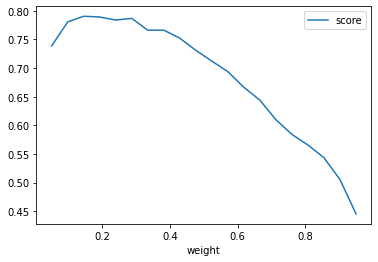

In [155]:
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
data_out.plot(x='weight')

In [156]:
data_out

,score,weight
0,0.738632,0.050000
1,0.780707,0.097368
2,0.790570,0.144737
3,0.789260,0.192105
4,0.783906,0.239474
5,0.786851,0.286842
6,0.766104,0.334211
7,0.766298,0.381579
8,0.752237,0.428947
9,0.730979,0.476316


In [157]:
clf = LogisticRegression(**grid_result.best_params_).fit(xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
pred_grd = clf.predict(xtest)

In [159]:
confusion_matrix(ytest,pred_grd)

array([[85279,    28],
       [   23,   113]])

In [160]:
generate_model_report(ytest, pred_grd)

Accuracy =  0.999403110845827
Precision =  0.8014184397163121
Recall =  0.8308823529411765
F1 Score =  0.8158844765342961


In [161]:
print("Classification Report")
print (classification_report(ytest,pred_grd))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.80      0.83      0.82       136

    accuracy                           1.00     85443
   macro avg       0.90      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443

